In [29]:
import os
import numpy as np
import cv2
import cv2.aruco as aruco
import time
import matplotlib.pyplot as plt

Generate Aruco Markers

In [96]:
f = open("darkconditions.txt", "r")
fw= open("darkdistdata.txt", "w")
distdata = np.array([])
t = np.array([])

for n in f:
  
    if n[0] == 't':
        #print(n)
        continue
    elif n[0] == 'd':
        #print(n[10:])
        distdata= np.append(distdata, float(n[10:]))
        
        fw.write(n[10:] + "\n")
    elif n[0] == '1':
        t = np.append(t, float(n[0:]))
fw.close()


In [86]:
1606077231.8885863 - 1606077227.5008764

4.387709856033325

In [78]:
# distdata[23]
# distdata[0:23] 
# distdata
# distdata[114:]
# distdata = np.delete(distdata, 114)
# distdata = np.delete(distdata, 23)

0.5102734565734863


Text(0, 0.5, 'Frequency')

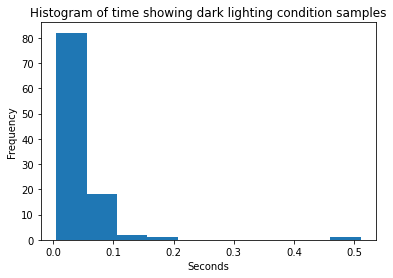

In [108]:
print(max(t[1:] - t[:len(t) - 1]))
np.mean(t[1:] - t[:len(t) - 1])
plt.hist(t[1:] - t[:len(t) - 1])
plt.title('Histogram of time showing dark lighting condition samples')
plt.xlabel('Seconds')
plt.ylabel('Frequency')

In [ ]:
# Load the predefined dictionary
dictionary = cv2.aruco.Dictionary_get(cv2.aruco.DICT_6X6_250)

# Generate the marker
markerImage = np.zeros((200, 200), dtype=np.uint8)
#dictionary, ID from dict, size of tag, object to store tag, thickness parameter
markerImage = cv2.aruco.drawMarker(dictionary, 34, 200, markerImage, 1);

cv2.imwrite("marker34.png", markerImage);

In [53]:
 5 *30.48 /0.4181230466125173 

364.4860077307148

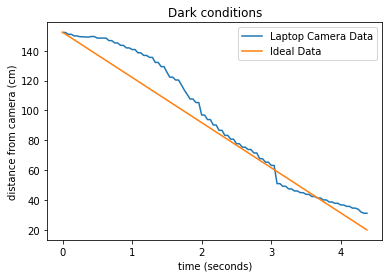

In [87]:
plt.plot(np.linspace(0, 4.38, len(distdata)), distdata * 5 * 30.48 / 0.453586, label='Laptop Camera Data' )
plt.plot(np.linspace(0, 4.38, len(distdata)), np.linspace(152.4, 20 , len(distdata)), label='Ideal Data')
plt.xlabel('time (seconds)')
plt.ylabel('distance from camera (cm)')
plt.title('Dark conditions')
plt.legend(loc='upper right')

In [7]:
print(os.path.dirname)

<function dirname at 0x00000216FDD85E50>


In [8]:
def calibrate():

    cap = cv2.VideoCapture(0)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

    # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
    # checkerboard of size (9 x 7) is used
    objp = np.zeros((7*9,3), np.float32)
    objp[:,:2] = np.mgrid[0:9,0:7].T.reshape(-1,2)

    # arrays to store object points and image points from all the images.
    objpoints = [] # 3d point in real world space
    imgpoints = [] # 2d points in image plane.

    while(True):
        # Capture frame-by-frame
        ret, frame = cap.read()
        # resizing for faster detection
        frame = cv2.resize(frame, (640, 480))
        # using a greyscale picture, also for faster detection
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (9,7), None)

        # If found, add object points, image points
        if ret == True:
            objpoints.append(objp)
            imgpoints.append(corners)

            # Draw and display the corners
            cv2.drawChessboardCorners(frame, (9,7), corners, ret)
            #write_name = 'corners_found'+str(idx)+'.jpg'

        # Display the resulting frame
        cv2.imshow('Calibration',frame)
        if cv2.waitKey(100) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()
    cv2.waitKey(10)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)

    #create a file to store data
    from lxml import etree
    from lxml.builder import E

    global fname
    with open(fname, "w") as f:
        f.write("{'ret':"+str(ret)+", 'mtx':"+str(list(mtx))+', "dist":'+str(list(dist))+'}')
        f.close()


#test wheater already calibrated or not
path = os.path.abspath('')
fname = path + "/res/calibration_parameters.txt"
print(fname)
try:
    f = open(fname, "r")
    f.read()
    f.close()
except:
    calibrate()


cap = cv2.VideoCapture(0)

#importing aruco dictionary
dictionary = cv2.aruco.Dictionary_get(cv2.aruco.DICT_6X6_250)

#calibration parameters
f = open(fname, "r")
ff = [i for i in f.readlines()]
f.close()
from numpy import array
parameters = eval(''.join(ff))
mtx = array(parameters['mtx'])
dist = array(parameters['dist'])

# Create absolute path from this module
file_abspath = os.path.join(os.path.dirname, 'Samples/box.obj')

tvec = [[[0, 0, 0]]]
rvec = [[[0, 0, 0]]]

aruco_dict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_6X6_250 )
### 
markerImage = np.zeros((200, 200), dtype=np.uint8)
#dictionary, ID from dict, size of tag, object to store tag, thickness parameter
markerImage = cv2.aruco.drawMarker(dictionary, 35, 200, markerImage, 1)
cv2.imwrite("marker33.png", markerImage);
###
markerLength = 0.25   # Here, our measurement unit is centimetre.
parameters = cv2.aruco.DetectorParameters_create()
parameters.adaptiveThreshConstant = 10

C:\Users\kathl\Desktop\slalomTello/res/calibration_parameters.txt


TypeError: expected str, bytes or os.PathLike object, not function

In [ ]:
while True:

    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
    font = cv2.FONT_HERSHEY_SIMPLEX
    if np.all(ids != None):
        rvec, tvec, _ = aruco.estimatePoseSingleMarkers(corners, 0.05, mtx, dist)

        #print(ids)
        #print(corners)
        #print(rvec)

        for i in range(0, ids.size):
            aruco.drawAxis(frame, mtx, dist, rvec[i], tvec[i], 0.1)

            # show translation vector on the corner
            font = cv2.FONT_HERSHEY_SIMPLEX
            text = str([round(i,5) for i in tvec[i][0]])
            position = tuple(corners[i][0][0])
            cv2.putText(frame, text, position, font, 0.4, (0, 0, 0), 1, cv2.LINE_AA)

            #get tvec, rvec of each id
            print('ids: ', ids[i])
            print('translation: ', tvec[i][0])
            print('rotation: ', rvec[i][0])

            print('distance: ', np.linalg.norm(tvec[i][0]))
        aruco.drawDetectedMarkers(frame, corners)
    else:
        tvec = [[[0, 0, 0]]]
        rvec = [[[0, 0, 0]]]
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
